# Goal: to build a predictive model to predict “what sorts of people were more likely to survive?” using passenger data 
it's supervised machine learning_classification example

# Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import SL classification model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# import libraries to split data, select model parameters
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# scaling data
from sklearn.preprocessing import MinMaxScaler

# Evaluate model performance: classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.getcwd())

C:\Users\gellima\Desktop\Springboard_DScience\MachineLearning_Case_Studies_for_practice\Titanic_SL_Classification


# Dataset

In [9]:
"""load datasets"""
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
subdf = pd.read_csv('gender_submission.csv')

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.shape

(891, 12)

In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
subdf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
sub_df=subdf.drop(['PassengerId'],axis=1) # drop PassengerId col from subdf
data=pd.concat([sub_df, test_df],axis=1) #concat two dataframes col wise due to diff cols in each df
df=pd.concat([data, train_df], axis=0) # concat daraframes row wise due to same columns
df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [17]:
df.isnull().sum()

Survived          0
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
df.shape

(1309, 12)

# EDA and Visualization

## missing values

Survived          0
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


<AxesSubplot:>

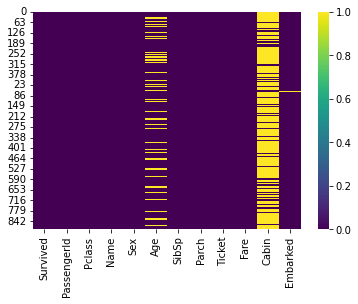

In [19]:
print(df.isnull().sum()) # print sum of missing values

sns.heatmap(df.isnull(), cmap='viridis') # heatmap of missing values

## plotting different features (target variable: Survived)

Text(0.5, 1.0, 'count plot of target variable')

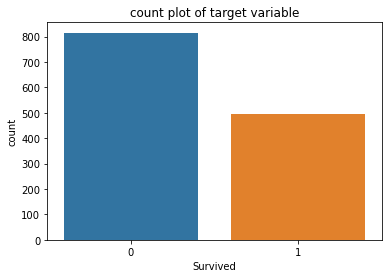

In [20]:
# Survived is a cateogical variable, so generating countplot
sns.countplot(df['Survived'])
plt.title('count plot of target variable')

## Correlation between features

             Survived  PassengerId    Pclass       Age     SibSp     Parch  \
Survived     1.000000    -0.020370 -0.264710 -0.053695  0.002370  0.108919   
PassengerId -0.020370     1.000000 -0.038354  0.028814 -0.055224  0.008942   
Pclass      -0.264710    -0.038354  1.000000 -0.408106  0.060832  0.018322   
Age         -0.053695     0.028814 -0.408106  1.000000 -0.243699 -0.150917   
SibSp        0.002370    -0.055224  0.060832 -0.243699  1.000000  0.373587   
Parch        0.108919     0.008942  0.018322 -0.150917  0.373587  1.000000   
Fare         0.233622     0.031428 -0.558629  0.178740  0.160238  0.221539   

                 Fare  
Survived     0.233622  
PassengerId  0.031428  
Pclass      -0.558629  
Age          0.178740  
SibSp        0.160238  
Parch        0.221539  
Fare         1.000000  


<AxesSubplot:>

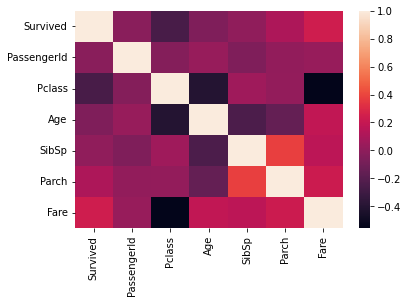

In [21]:
print(df.corr())
sns.heatmap(df.corr())

In [22]:
# print largest 4 correlations with y (target variable)
df.corr().nlargest(5, 'Survived')

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.020370,-0.264710,-0.053695,0.002370,0.108919,0.233622
Fare,0.233622,0.031428,-0.558629,0.178740,0.160238,0.221539,1.000000
Parch,0.108919,0.008942,0.018322,-0.150917,0.373587,1.000000,0.221539
SibSp,0.002370,-0.055224,0.060832,-0.243699,1.000000,0.373587,0.160238
PassengerId,-0.020370,1.000000,-0.038354,0.028814,-0.055224,0.008942,0.031428


In [23]:
df.corr().nlargest(5, 'Survived')['Survived'].index

Index(['Survived', 'Fare', 'Parch', 'SibSp', 'PassengerId'], dtype='object')

### Drop smallest correlation features (with most missing values/ less important features)


In [24]:
df1=df.drop(['Ticket','Cabin', 'Name'], axis=1)
df1.head()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,892,3,male,34.5,0,0,7.8292,Q
1,1,893,3,female,47.0,1,0,7.0000,S
2,0,894,2,male,62.0,0,0,9.6875,Q
3,0,895,3,male,27.0,0,0,8.6625,S
4,1,896,3,female,22.0,1,1,12.2875,S


## Bivariate plots 

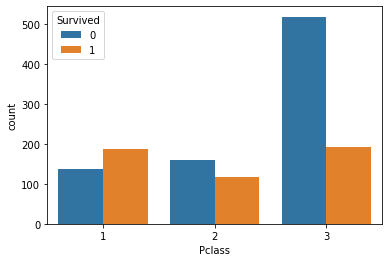

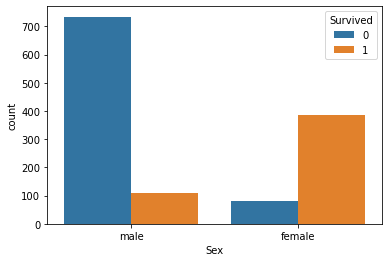

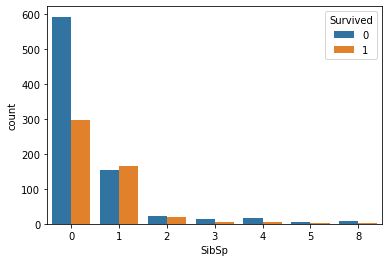

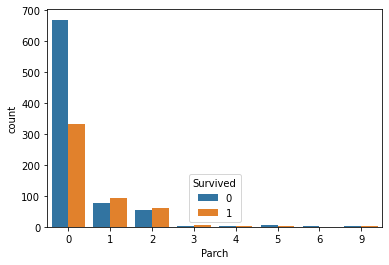

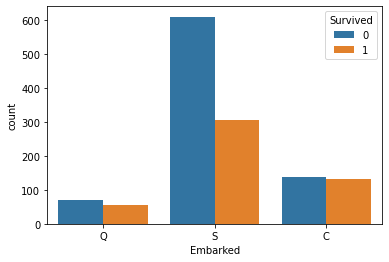

In [25]:
cat_cols=['Pclass','Sex','SibSp','Parch','Embarked']
# plot Survival for each sex
for i in cat_cols:
    sns.countplot(x=df1[i], hue=df1['Survived'])
    plt.show()

### observations: In 1st class the number of survivors are more but in 3rd class passagers not survived are double than survivors
survivors are mostly female and with no or 1 siblings/spouse.

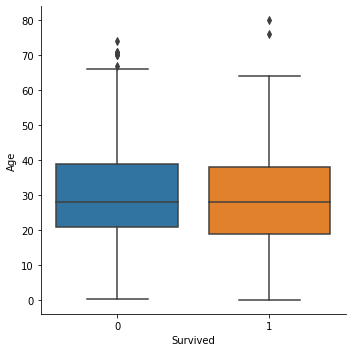

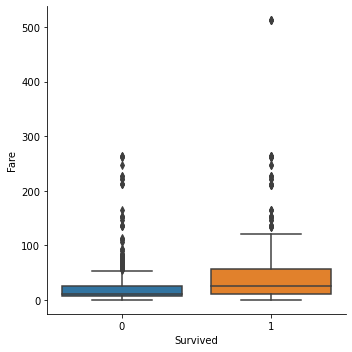

In [26]:
sns.catplot(y="Age", x="Survived", kind="box", data=df1)
sns.catplot(y="Fare", x="Survived", kind="box", data=df1)
plt.show()


In [27]:
df2=df1[df1['Fare']<400]
df2.shape

(1304, 9)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     1304 non-null   int64  
 1   PassengerId  1304 non-null   int64  
 2   Pclass       1304 non-null   int64  
 3   Sex          1304 non-null   object 
 4   Age          1041 non-null   float64
 5   SibSp        1304 non-null   int64  
 6   Parch        1304 non-null   int64  
 7   Fare         1304 non-null   float64
 8   Embarked     1302 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 101.9+ KB


# Data Cleaning/preprocessing

## First, handling numeric columns

In [29]:
survived=df2['Survived']
features=df2.drop(['Survived'],axis=1)

In [30]:
features.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [31]:
num_data=features.select_dtypes(exclude='object')
num_data=num_data.fillna(num_data.mean())
num_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


## Then, handling categorical data


In [32]:
cat_data=features.select_dtypes(include='object')
cat_data.head()

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S


In [33]:
cat_data=cat_data.fillna('None')
dummy_cat=pd.get_dummies(cat_data)
dummy_cat.head()

,Sex_female,Sex_male,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,0,1,0,0,1,0
1,1,0,0,0,0,1
2,0,1,0,0,1,0
3,0,1,0,0,0,1
4,1,0,0,0,0,1


In [34]:
data_set=pd.concat([num_data, dummy_cat], axis=1)
data_set=data_set.reset_index()
data_set.head()

,index,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0
1,1,893,3,47.0,1,0,7.0000,1,0,0,0,0,1
2,2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0
3,3,895,3,27.0,0,0,8.6625,0,1,0,0,0,1
4,4,896,3,22.0,1,1,12.2875,1,0,0,0,0,1


In [35]:
# append Survived column values kept aside earlier
data_set['Survived']=survived.values
data_set.head()

,index,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,Survived
0,0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,0
1,1,893,3,47.0,1,0,7.0000,1,0,0,0,0,1,1
2,2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,0
3,3,895,3,27.0,0,0,8.6625,0,1,0,0,0,1,0
4,4,896,3,22.0,1,1,12.2875,1,0,0,0,0,1,1


In [36]:
data_set.shape

(1304, 14)

## Establish Test data as dataframe and ndarray

In [37]:
test_dfn = data_set.iloc[ 891 : ,:-1]
test_df = data_set.iloc[ 891 : ,:-1].values ## changed to ndarray
test_dfn.shape

(413, 13)

In [38]:
test_df

array([[476., 477.,   2., ...,   0.,   0.,   1.],
       [477., 478.,   3., ...,   0.,   0.,   1.],
       [478., 479.,   3., ...,   0.,   0.,   1.],
       ...,
       [888., 889.,   3., ...,   0.,   0.,   1.],
       [889., 890.,   1., ...,   0.,   0.,   0.],
       [890., 891.,   3., ...,   0.,   1.,   0.]])

## Separating features (X) and target variable (y)

In [39]:
X=data_set.iloc[:,:-1].values
y=data_set['Survived'].values
X

array([[  0., 892.,   3., ...,   0.,   1.,   0.],
       [  1., 893.,   3., ...,   0.,   0.,   1.],
       [  2., 894.,   2., ...,   0.,   1.,   0.],
       ...,
       [888., 889.,   3., ...,   0.,   0.,   1.],
       [889., 890.,   1., ...,   0.,   0.,   0.],
       [890., 891.,   3., ...,   0.,   1.,   0.]])

In [40]:
X.shape

(1304, 13)

In [322]:
y

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [41]:
y.shape

(1304,)

# Feature scaling

In [323]:
scaling=MinMaxScaler(feature_range=(0,1))
X=scaling.fit_transform(X) # Fit and transform MinMaxScaler to X
test_df=scaling.fit_transform(test_df) # Fit and transform MinMaxScaler to test dataset that we set apart

# Train & Test Split

In [324]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=44)

# Machine Learning Classification Models

## Logistic Regression

In [344]:
lgm=LogisticRegression()
model=lgm.fit(X_train, y_train)
y_trpred=model.predict(X_train)
y_pred=model.predict(X_test)

# metrics to evaluate Logistic Regression Classification Model
print('Train score:', accuracy_score(y_train, y_trpred))
print("Test score:", accuracy_score(y_test, y_pred))
print("           ")
print(confusion_matrix(y_test, y_pred))
print("           ")
print(classification_report(y_test, y_pred))

Train score: 0.8629385964912281
Test score: 0.8418367346938775
           
[[214  24]
 [ 38 116]]
           
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       238
           1       0.83      0.75      0.79       154

    accuracy                           0.84       392
   macro avg       0.84      0.83      0.83       392
weighted avg       0.84      0.84      0.84       392



## Random Forrest Classifier

In [347]:
rfc=RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
model=rfc.fit(X_train, y_train)
y_trpred=model.predict(X_train)
y_pred=model.predict(X_test)

# metrics to evaluate RandomForestClassifier Model
print('Train score:', accuracy_score(y_train, y_trpred))
print('Test score:', accuracy_score(y_test, y_pred))
print('               ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train score: 0.875
Test score: 0.8545918367346939
               
[[218  20]
 [ 37 117]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       238
           1       0.85      0.76      0.80       154

    accuracy                           0.85       392
   macro avg       0.85      0.84      0.84       392
weighted avg       0.85      0.85      0.85       392



## Gradient Boosting Classifier

In [353]:
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3, random_state=140)
model=gbc.fit(X_train, y_train)
y_trpred=model.predict(X_train)
y_pred=model.predict(X_test)

# metrics to evaluate Gradient Boosting Classifier Model
print('Train score:', accuracy_score(y_train, y_trpred))
print('Test score:', accuracy_score(y_test, y_pred))
print('               ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train score: 1.0
Test score: 0.8647959183673469
               
[[211  27]
 [ 26 128]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       238
           1       0.83      0.83      0.83       154

    accuracy                           0.86       392
   macro avg       0.86      0.86      0.86       392
weighted avg       0.86      0.86      0.86       392



## suport vector classifier (SVC)

In [354]:
svc=SVC()
model=svc.fit(X_train, y_train)
y_trpred=model.predict(X_train)
y_pred=model.predict(X_test)

# metrics to evaluate suport vector classifier Model
print('Train score:', accuracy_score(y_train, y_trpred))
print('Test score:', accuracy_score(y_test, y_pred))
print('               ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train score: 0.8782894736842105
Test score: 0.8596938775510204
               
[[231   7]
 [ 48 106]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       238
           1       0.94      0.69      0.79       154

    accuracy                           0.86       392
   macro avg       0.88      0.83      0.84       392
weighted avg       0.87      0.86      0.85       392



# PREDICTION

In [356]:
test_dfn.head()

,index,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
891,476,477,2,34.0,1,0,21.0000,0,1,0,0,0,1
892,477,478,3,29.0,1,0,7.0458,0,1,0,0,0,1
893,478,479,3,22.0,0,0,7.5208,0,1,0,0,0,1
894,479,480,3,2.0,0,1,12.2875,1,0,0,0,0,1
895,480,481,3,9.0,5,2,46.9000,0,1,0,0,0,1


In [357]:
y_pred=svc.predict(test_df)

predicted_data=pd.DataFrame({'Passenger_id':test_dfn['PassengerId'],
                            'Survived':y_pred})
predicted_data.head()

,Passenger_id,Survived
891,477,0
892,478,0
893,479,0
894,480,0
895,481,0


In [359]:
## write predicted data to csv
predicted_data.to_csv('Titanic_SL_Classification/Titanic_prediction.csv')